<a href="https://colab.research.google.com/github/DemitriusBR/Desafio_DNC---Python-Machine-Learning-/blob/main/Desafio_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Verificando a versão utilizado do Sklearn
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
# Instalando a nova versão de Sklern
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 58.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


# **Bibliotecas** **utilizadas**

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Data Frame importado **

In [ ]:
# Importado a base de dados em csv
df = pd.read_csv("streaming_data.csv", encoding='ISO-8859-1', sep=",")
# Verifcação da estruturação dos dados
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


# **Data Preparation**

In [ ]:
# Informações datalhadas dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [ ]:
# Inforamções estatisticas do DataFrame
df.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [ ]:
# Alteração das informações vazias para O
df["Time_on_platform"].fillna(0, inplace=True)
df["Num_streaming_services"].fillna(0, inplace=True)
df["Churned"].fillna(0, inplace=True)
df["Avg_rating"].fillna(0, inplace=True)
df["Devices_connected"].fillna(0, inplace=True)

In [ ]:
# Dropagem das linhas que apresenta dados nulos
df.dropna(subset = "Gender", inplace=True)
df.dropna(subset = "Age", inplace=True)
df.dropna(subset = "Subscription_type", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36515 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     36515 non-null  float64
 1   Gender                  36515 non-null  object 
 2   Time_on_platform        36515 non-null  float64
 3   Devices_connected       36515 non-null  float64
 4   Subscription_type       36515 non-null  object 
 5   Num_streaming_services  36515 non-null  float64
 6   Num_active_profiles     36515 non-null  int64  
 7   Avg_rating              36515 non-null  float64
 8   Churned                 36515 non-null  float64
 9   User_id                 36515 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


In [ ]:
# Verificação da estruturação dos dados
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,0.0,3,0.00,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,0.0,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,0.0,5.0,Basic,0.0,2,0.00,0.0,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
5,54.0,Male,3024.0,2.0,Basic,0.0,1,0.00,0.0,a1df3a13-9255-4d00-8a9d-20565fefaab9


In [ ]:
# Alterção das coluna Churned {1 = SIM; 0 = NÃO}
df['Churned'] = df['Churned'].map({1: 'SIM', 0: 'NÃO'})
# Dropagem da coluna de ID
df.drop('User_id', axis=1, inplace=True)
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
0,49.0,Male,4700.0,3.0,Basic,0.0,3,0.00,NÃO
1,69.0,Female,6107.0,2.0,Standard,0.0,1,2.14,NÃO
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,SIM
3,26.0,Male,0.0,5.0,Basic,0.0,2,0.00,NÃO
5,54.0,Male,3024.0,2.0,Basic,0.0,1,0.00,NÃO


In [ ]:
# Contagem de cada valores Não/Sim da coluna Churned
df['Churned'].value_counts()

Churned
NÃO    29459
SIM     7056
Name: count, dtype: int64

In [ ]:
# Alterção dos valores para int
df['Age'] = df['Age'].astype(int)
df['Time_on_platform'] = df['Time_on_platform'].astype(int)
df['Devices_connected'] = df['Devices_connected'].astype(int)
df['Num_streaming_services'] = df['Num_streaming_services'].astype(int)
df['Avg_rating'] = df['Avg_rating'].astype(int)
# Verficia a estruturação dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36515 entries, 0 to 77883
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     36515 non-null  int64 
 1   Gender                  36515 non-null  object
 2   Time_on_platform        36515 non-null  int64 
 3   Devices_connected       36515 non-null  int64 
 4   Subscription_type       36515 non-null  object
 5   Num_streaming_services  36515 non-null  int64 
 6   Num_active_profiles     36515 non-null  int64 
 7   Avg_rating              36515 non-null  int64 
 8   Churned                 36515 non-null  object
dtypes: int64(6), object(3)
memory usage: 2.8+ MB


In [ ]:
# Inicializando um objeto LabelEncoder
le = LabelEncoder()
# Ajustando o LabelEncoder aos valores da coluna 'Churned' do DataFrame 'df' e transformando
le.fit(df.Churned)
df.Churned = le.transform(df.Churned)

In [ ]:
# Transformar os valores da coluna 'Gender' em códigos numéricos
df['Gender'] = le.fit_transform(df['Gender'])
# Criar variáveis dummy para a coluna 'Subscription_type'
df = pd.get_dummies(df, columns=['Subscription_type'], drop_first=True)
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,Subscription_type_1,Subscription_type_2
0,49,1,4700,3,0,3,0,0,False,False
1,69,0,6107,2,0,1,2,0,False,True
2,44,1,6374,3,1,1,1,1,True,False
3,26,1,0,5,0,2,0,0,False,False
5,54,1,3024,2,0,1,0,0,False,False


In [ ]:
from sklearn.preprocessing import MinMaxScaler


# Cria uma instância do MinMaxScaler
scaler = MinMaxScaler()

# Aplica a transformação de escala aos dados do DataFrame df, usando o método fit_transform do MinMaxScaler
df_norm = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

# Exibe as primeiras 10 linhas do DataFrame normalizado, para ver os resultados da transformação
df_norm.head(10)

,Age,Gender,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,Subscription_type_1,Subscription_type_2
0,0.607843,1.0,0.536591,0.6,0.00,0.50,0.0,0.0,0.0,0.0
1,1.000000,0.0,0.697226,0.4,0.00,0.00,0.4,0.0,0.0,1.0
2,0.509804,1.0,0.727709,0.6,0.25,0.00,0.2,1.0,1.0,0.0
3,0.156863,1.0,0.000000,1.0,0.00,0.25,0.0,0.0,0.0,0.0
5,0.705882,1.0,0.345245,0.4,0.00,0.00,0.0,0.0,0.0,0.0
9,0.058824,0.0,0.012787,0.4,0.00,0.50,0.4,1.0,0.0,0.0
11,0.843137,1.0,0.615253,0.6,0.00,0.75,0.6,0.0,0.0,1.0
14,0.509804,1.0,0.479278,0.2,0.00,0.50,0.4,0.0,0.0,0.0
15,0.235294,1.0,0.263272,0.6,0.00,1.00,0.6,0.0,1.0,0.0
20,0.039216,1.0,0.290216,1.0,0.00,0.00,0.0,1.0,0.0,0.0


In [ ]:
# Exibindo as informações do DataFrame
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36515 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     36515 non-null  float64
 1   Gender                  36515 non-null  float64
 2   Time_on_platform        36515 non-null  float64
 3   Devices_connected       36515 non-null  float64
 4   Num_streaming_services  36515 non-null  float64
 5   Num_active_profiles     36515 non-null  float64
 6   Avg_rating              36515 non-null  float64
 7   Churned                 36515 non-null  float64
 8   Subscription_type_1     36515 non-null  float64
 9   Subscription_type_2     36515 non-null  float64
dtypes: float64(10)
memory usage: 3.1 MB


In [ ]:
# Criando um DataFrame X contendo as variáveis independentes
X = df_norm[["Age","Gender","Time_on_platform","Devices_connected","Subscription_type_1","Subscription_type_2","Num_streaming_services","Avg_rating"]]
# Criando um novo DataFrame para armazenar os valores de X
X = pd.DataFrame(X)
# Criando um DataFrame y contendo a variável dependente
y = df_norm[["Churned"]].copy()
# Criando um novo DataFrame para armazenar os valores de Y
y = pd.DataFrame(y)

In [ ]:
# Verificação da estrutura do X
X.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type_1,Subscription_type_2,Num_streaming_services,Avg_rating
0,0.607843,1.0,0.536591,0.6,0.0,0.0,0.00,0.0
1,1.000000,0.0,0.697226,0.4,0.0,1.0,0.00,0.4
2,0.509804,1.0,0.727709,0.6,1.0,0.0,0.25,0.2
3,0.156863,1.0,0.000000,1.0,0.0,0.0,0.00,0.0
5,0.705882,1.0,0.345245,0.4,0.0,0.0,0.00,0.0


In [ ]:
# Utilização do train_test_split para treinar as variavies treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y)

In [ ]:
# Criando uma instância do modelo de Regressão Logística
model = LogisticRegression()
# Criando uma instância do modelo de Regressão Logística
lr = model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Fazendo previsões usando o modelo de Regressão Logística treinado
lr.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
# Atribuindo as previsões do modelo de Regressão Logística
X_test.assign(churn=y_test).assign(label=lr.predict(X_test))

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type_1,Subscription_type_2,Num_streaming_services,Avg_rating,churn,label
59616,0.666667,1.0,0.125014,0.4,0.0,1.0,0.00,0.6,0.0,0.0
5020,0.960784,0.0,0.163489,0.2,0.0,0.0,0.00,0.8,0.0,0.0
73373,0.254902,0.0,0.000000,0.8,1.0,0.0,0.75,0.0,0.0,0.0
62415,0.529412,1.0,0.326978,0.2,0.0,0.0,0.00,0.8,0.0,0.0
64361,0.137255,0.0,0.511816,0.0,1.0,0.0,0.00,0.4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
36290,0.274510,0.0,0.495605,0.0,0.0,1.0,0.00,0.4,0.0,0.0
1359,0.960784,1.0,0.196484,0.4,0.0,0.0,0.00,0.2,0.0,0.0
67919,0.941176,1.0,0.534079,0.2,0.0,1.0,0.00,0.4,0.0,0.0
9984,0.117647,1.0,0.022034,0.0,0.0,1.0,0.00,0.2,0.0,0.0


In [ ]:
#from sklearn.metrics import plot_confusion_matrix
#lot_confusion_matrix(lr, X_test, y_test, values_format="d")
#plt.show()

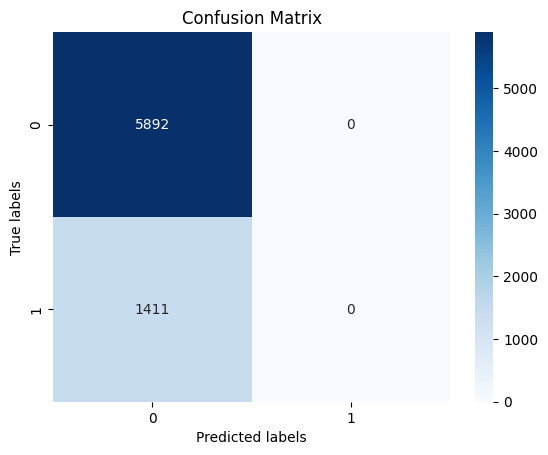

In [ ]:
# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, lr.predict(X_test))

# Plotar a matriz de confusão usando seaborn
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:

from sklearn.metrics import accuracy_score,balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
# Calculando e imprimindo as metricas das previsão
print(f"Acurácia treino: {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia teste: {accuracy_score(y_test, lr.predict(X_test))}")
print("-------------------------------------------------------------------------")
print(f"Acurácia Balanceada Treino: {balanced_accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia Balanceada Teste: {balanced_accuracy_score(y_test, lr.predict(X_test))}")
print("-------------------------------------------------------------------------")
print(f"Precisão Treino: {precision_score(y_train, lr.predict(X_train))}")
print(f"Precisão Teste: {precision_score(y_test, lr.predict(X_test))}")
print("-------------------------------------------------------------------------")
print(f"Recall Treino: {recall_score(y_train, lr.predict(X_train))}")
print(f"Recall Teste: {recall_score(y_test, lr.predict(X_test))}")
print("-------------------------------------------------------------------------")
print(f"F1 Treino: {f1_score(y_train, lr.predict(X_train))}")
print(f"F1 Teste: {f1_score(y_test, lr.predict(X_test))}")
print("-------------------------------------------------------------------------")
print(f"ROCAUC Treino: {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}")
print(f"ROCAUC Test: {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}")

Acurácia treino: 0.8067574969190744
Acurácia teste: 0.8067917294262632
-------------------------------------------------------------------------
Acurácia Balanceada Treino: 0.5
Acurácia Balanceada Teste: 0.5
-------------------------------------------------------------------------
Precisão Treino: 0.0
Precisão Teste: 0.0
-------------------------------------------------------------------------
Recall Treino: 0.0
Recall Teste: 0.0
-------------------------------------------------------------------------
F1 Treino: 0.0
F1 Teste: 0.0
-------------------------------------------------------------------------
ROCAUC Treino: 0.5138377577780524
ROCAUC Test: 0.49911266005678395


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  Support beyond term:`binary` targets is achieved by treating :term:`multiclass`
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  Support beyond term:`binary` targets is achieved by treating :term:`multiclass`


In [ ]:
#from sklearn.metrics import plot_roc_curve
#plot_roc_curve(lr, X_test, y_test)

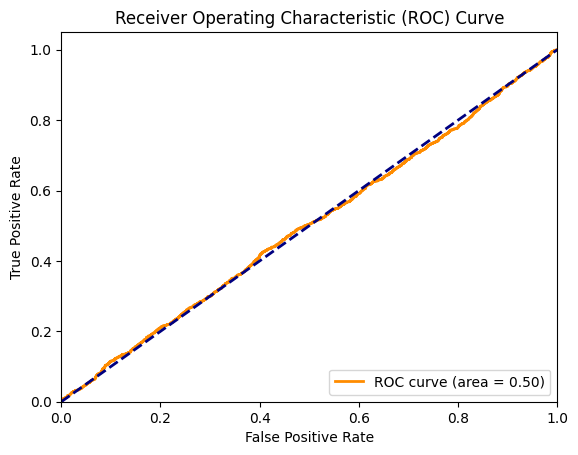

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcular as probabilidades previstas do modelo
y_prob = lr.predict_proba(X_test)[:, 1]

# Calcular a curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# **Tunning DecisionTreeClassifier **

In [ ]:
#tunning

arvore = DecisionTreeClassifier()
arvore.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Analisando a Acurácia das predições
print(f"Acurácia treino: {accuracy_score(y_train, arvore.predict(X_train))}")
print(f"Acurácia teste: {accuracy_score(y_test, arvore.predict(X_test))}")

Acurácia treino: 0.9820621662330549
Acurácia teste: 0.7514719978091196


In [ ]:
# Criar o classificador DecisionTreeClassifier
arvore = DecisionTreeClassifier()

# Definir os parâmetros para a busca de hiperparâmetros (reduzindo a complexidade)
parameters = {"max_depth": [1, 2, 3, 4, 5]}

# Criar o objeto GridSearchCV com n_jobs=1 e a métrica de acurácia
grid_search = GridSearchCV(arvore, parameters, scoring="accuracy", cv=5, n_jobs=1)

# Realizar a busca de hiperparâmetros
grid_search.fit(X_train, y_train.ravel())

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'max_depth': [1, 2, 3, 4, 5]}, scoring='accuracy')

In [ ]:
# Definir quais são o melhores parametros
grid_search.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
# Utilização das melhores metricas avaliadas pelo get_params()
arvore_tunned = DecisionTreeClassifier(
 ccp_alpha= 0.0,
 class_weight= None,
 criterion= 'gini',
 max_depth= 1,
 max_features= None,
 max_leaf_nodes= None,
 min_impurity_decrease= 0.0,
 min_samples_leaf= 1,
 min_samples_split= 2,
 min_weight_fraction_leaf= 0.0,
 random_state= None,
 splitter= 'best')

In [ ]:
# Treinado o modelo aperfeiçoado pelo get_params
arvore_tunned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [ ]:
# Printando o desempenho calculado pelo modelo
print(f"Acurácia treino: {accuracy_score(y_train, arvore_tunned.predict(X_train))}")
print(f"Acurácia teste: {accuracy_score(y_test, arvore_tunned.predict(X_test))}")

Acurácia treino: 0.8067574969190744
Acurácia teste: 0.8067917294262632


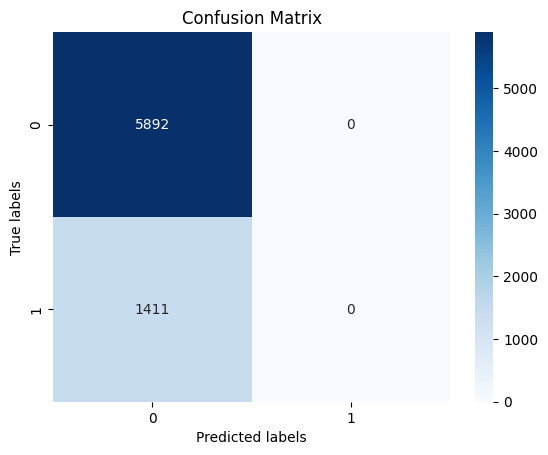

In [ ]:
# Calcular a matriz de confusão do modelo DecisionTreeClassifier
conf_matrix = confusion_matrix(y_test, arvore_tunned.predict(X_test))

# Plotar a matriz de confusão usando seaborn
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# **Tunning RandomForestClassifier**

In [ ]:
# Criando uma instância do classificador RandomForest
rf = RandomForestClassifier()

In [ ]:
# Treinando o modelo de Random Forest com os dados de treinamento
rf.fit(X_train, y_train)
# Printando o desempenho das previsões
print(f"Acurácia treino: {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia teste: {accuracy_score(y_test, rf.predict(X_test))}")

Acurácia treino: 0.9819937012186772
Acurácia teste: 0.8198000821580173


In [ ]:
# Criar o classificador RandomForestClassifier
rf = RandomForestClassifier()

# Definir os parâmetros para a busca de hiperparâmetros (reduzindo a complexidade)
parameters = {"max_depth": [1, 2, 3, 4, 5],
              "n_estimators": [100, 300, 500]}

# Criar o objeto GridSearchCV com n_jobs=1 e a métrica de ROC AUC
grid_search = GridSearchCV(rf, parameters, scoring="roc_auc", cv=5, n_jobs=1)

# Realizar a busca de hiperparâmetros
grid_search.fit(X_train, y_train.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [100, 300, 500]},
             scoring='roc_auc')

In [ ]:
# Obtendo os parâmetros do melhor estimador encontrado durante a busca em grade
grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Criando uma instância do classificador RandomForestClassifier
rf_tunned = RandomForestClassifier(
 bootstrap= True,
 ccp_alpha= 0.0,
 class_weight= None,
 criterion= 'gini',
 max_depth= 5,
 max_features= 'sqrt',
 max_leaf_nodes= None,
 max_samples= None,
 min_impurity_decrease= 0.0,
 min_samples_leaf= 1,
 min_samples_split= 2,
 min_weight_fraction_leaf= 0.0,
 n_estimators= 300,
 n_jobs= None,
 oob_score= False,
 random_state= None,
 verbose= 0,
 warm_start= False
)

In [ ]:
# Treinando o modelo RandomForestClassifier com os dados de treinamento
rf_tunned.fit(X_train, y_train)
# Printando o desempenho das previsões
print(f"Acurácia treino: {accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia teste: {accuracy_score(y_test, rf_tunned.predict(X_test))}")

Acurácia treino: 0.8067574969190744
Acurácia teste: 0.8067917294262632


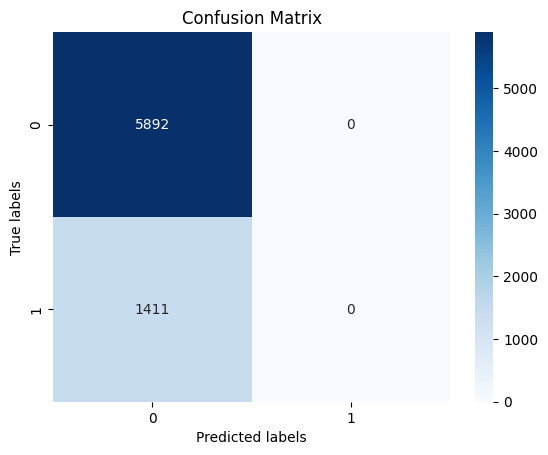

In [ ]:
# Calcular a matriz de confusão do modelo RandomForest
conf_matrix = confusion_matrix(y_test, rf_tunned.predict(X_test))

# Plotar a matriz de confusão usando seaborn
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()